# **ATLETAS JUEGOS OLIMPICOS**

- **Fuente de datos**: *[Link datos](https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data/data)*

- **Intro**: Contiene información detallada sobre los atletas que han participado en los Juegos Olímpicos, a lo largo de la historia. Incluye datos como el nombre del atleta, género, edad, altura, peso, país, deporte, evento y medalla obtenida (si aplica).

- **Objetivo Principal**: Analizar los factores que influyen en el desempeño de los atletas olímpicos y la distribución de medallas a lo largo de la historia, considerando variables como características físicas, deportes, países y temporadas.

## **LIBRERIAS**

In [14]:
import pandas as pd
import os
ruta= os.getcwd()
print(ruta)
file_name=[x for x in os.listdir() if 'dataset_' in x][0]
file_name

/Users/valentinafuentes/Bootcamp


'dataset_olympics.csv'

## **DATA EXTRACTION**

In [15]:
df=pd.read_csv(f"{ruta}/{file_name}",sep=",",encoding='utf-8')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Giant Slalom,NaN
69996,35656,Stuart Fitzsimmons,M,19.0,NaN,NaN,Great Britain,GBR,1976 Winter,1976,Winter,Innsbruck,Alpine Skiing,Alpine Skiing Men's Slalom,NaN
69997,35657,"David Thomas ""Dave"" Fitzsimons",M,26.0,170.0,65.0,Australia,AUS,1976 Summer,1976,Summer,Montreal,Athletics,"Athletics Men's 10,000 metres",NaN
69998,35657,"David Thomas ""Dave"" Fitzsimons",M,30.0,170.0,65.0,Australia,AUS,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN


In [16]:
df.shape

(70000, 15)

In [17]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

## **COLUMNAS DE INTERÉS**
- **`SEX, AGE, HEIGHT, WEIGHT`**: Características físicas de género, edad, peso y estatura, que pueden ser relevantes para el deporte
- **`TEAM`**: Indica la nacionalidad del atleta
- **`SPORT`**: Tipo de deporte practicado por el atleta
- **`YEAR, SEASON, CITY`**: Da el contexto historico sobre el año, temporada y ciudad del evento
- **`MEDAL`**: Indica la medalla obtenida por el atleta (si aplica)

In [18]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

## **VISUALIZACIONES**

### **MATPLOTLIB**

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [20]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'Atletas')

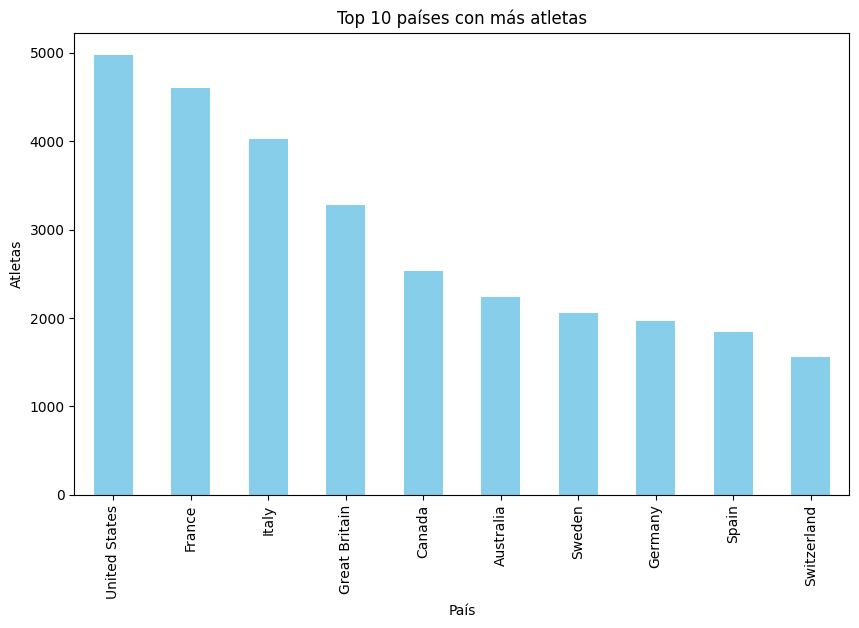

In [29]:
top_countries=df['Team'].value_counts().head(10)
df_top_countries=df[df['Team'].isin(top_countries)]
top_countries.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 países con más atletas', fontsize=12)
plt.xlabel('País', fontsize=10)
plt.ylabel('Atletas', fontsize=10)

In [44]:
top_countries=df['Team'].value_counts().head(10)
top_countries

Team
United States    4979
France           4608
Italy            4023
Great Britain    3282
Canada           2536
Australia        2235
Sweden           2057
Germany          1965
Spain            1836
Switzerland      1560
Name: count, dtype: int64

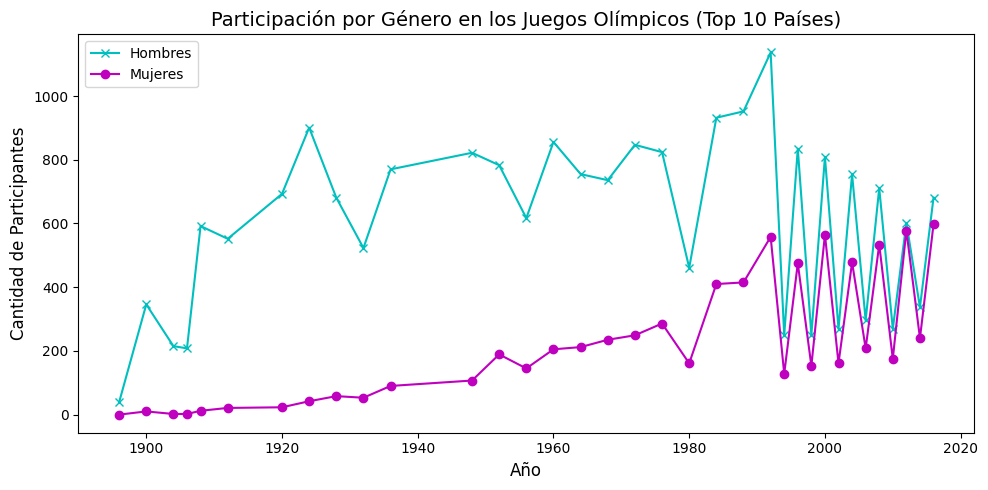

In [36]:
top_countries = df['Team'].value_counts().head(10).index
df_top_countries = df[df['Team'].isin(top_countries)]
df_participacion = df_top_countries[['Year', 'Sex']]
genero_counts = df_participacion.groupby(['Year', 'Sex']).size().unstack(fill_value=0)
years = genero_counts.index
men_counts = genero_counts['M']
women_counts = genero_counts['F']

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(years, men_counts, label='Hombres', color='c', marker='x')
ax.plot(years, women_counts, label='Mujeres', color='m', marker='o')
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Cantidad de Participantes', fontsize=12)
ax.set_title('Participación por Género en los Juegos Olímpicos (Top 10 Países)', fontsize=14)
ax.legend(loc='upper left')
plt.tight_layout()

### **SEABORN**

In [37]:
import seaborn as sns

Text(49.347999999999985, 0.5, 'Peso (kg)')

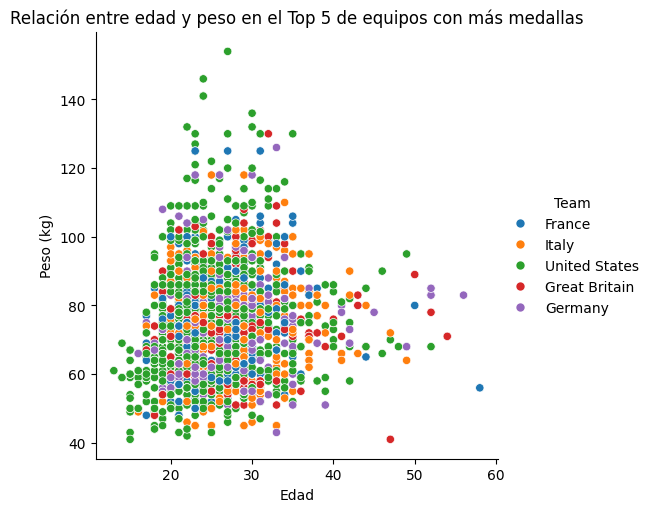

In [47]:
df_medals=df_top_countries[df_top_countries['Medal'].notna()]
top_medalist=df_medals['Team'].value_counts().head(5).index
df_top_teams=df_medals[df_medals['Team'].isin(top_medalist)]
sns.relplot(data=df_top_teams, x='Age', y='Weight', hue='Team', kind='scatter')
plt.title('Relación entre edad y peso en el Top 5 de equipos con más medallas', fontsize=12)
plt.xlabel('Edad', fontsize=10)
plt.ylabel('Peso (kg)', fontsize=10)

In [58]:
top_medalist

Team
United States    1460
France            571
Italy             571
Great Britain     481
Germany           396
Name: count, dtype: int64

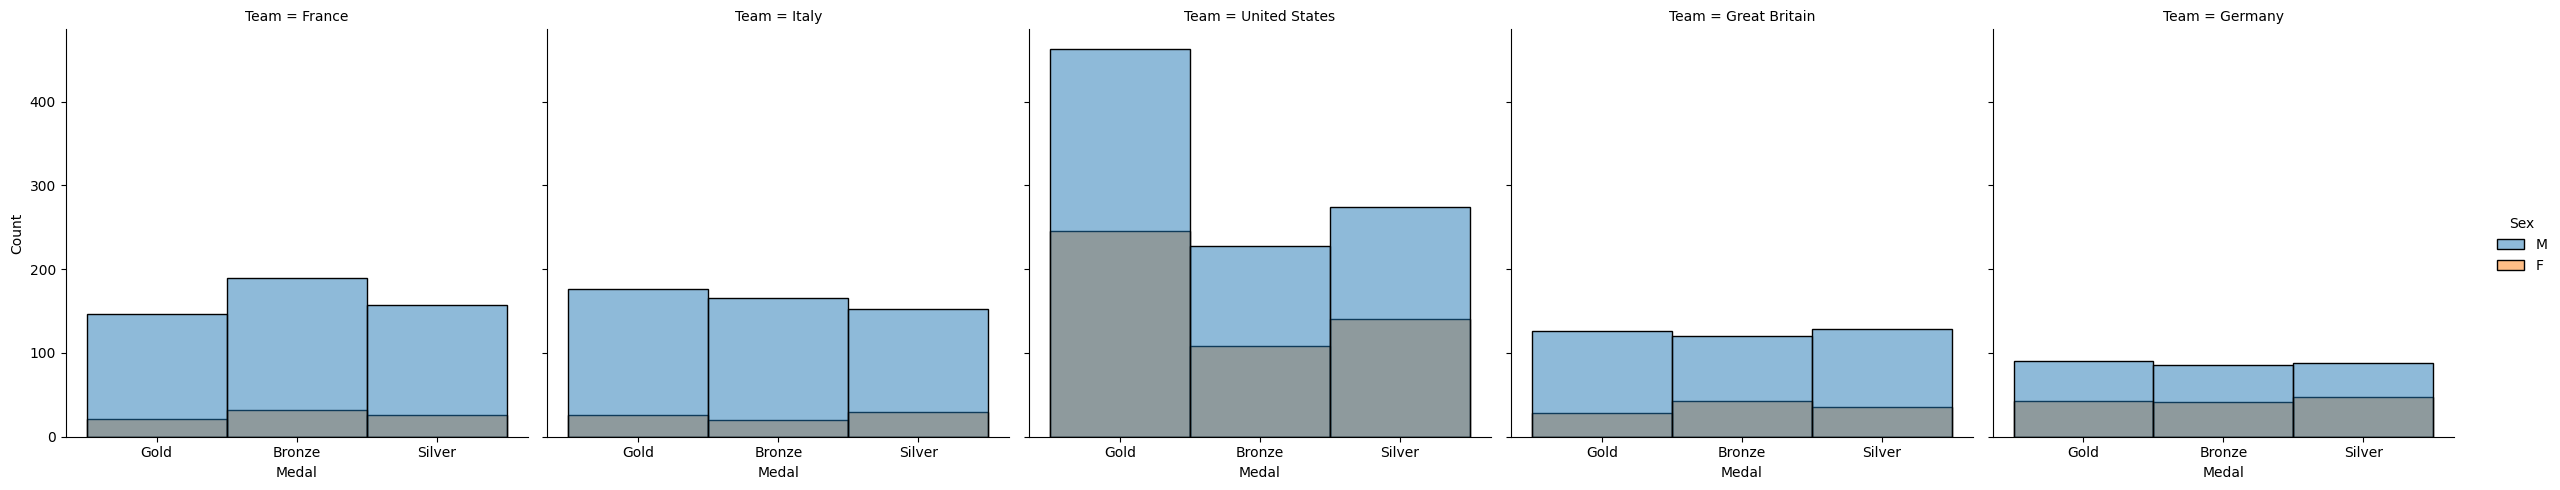

In [40]:
sns.displot(data=df_top_teams, x='Medal', hue='Sex', col='Team')

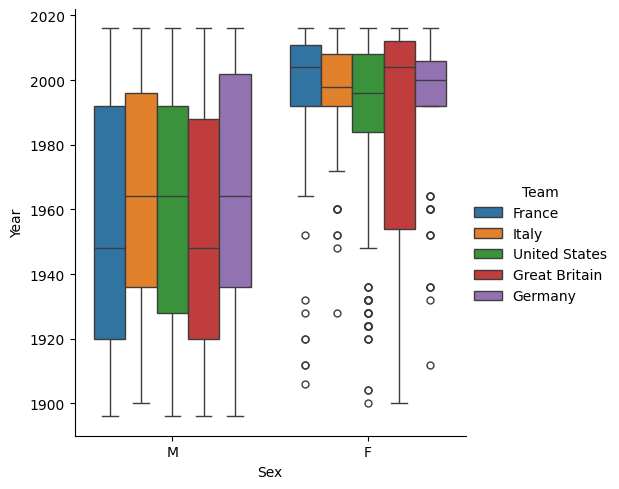

In [41]:
sns.catplot(data=df_top_teams, x='Sex', y='Year', kind='box', hue='Team')

### **PLOTLY**